#CPSC 483 - Project 5
##Winston Do
This project was focused on training classification models on a three seperate datasets with two features each. The classifcation was binary, either the element belonged to once class or a another (0,1). 

Three different classifier models were trained: Logistic Regression (LR), Gaussian Naive Base (GNB) and k-Nearest Neighbor (KNN). Each model was trained on three sepereate datasets for a total of 9 total classification models were trained throughout the experiment. Whenever possible, the dataset would be split with a 80/20% training/test ratio.

After the models were trained, their accuracies using the .score() attribute would be compared. 

The LR classifier performed well for the first data set (exactly 1), slightly worse on the third dataset (around 0.9) and poorly for the second data set (around 0.5).

The GNB classifier performed well for all three data sets (close to one for all of them). 

The KNN classifier proved to be the best, with all scores being exactly 1.

To visualize the scores, a decision boundary was drawn for each one of the models. Due to the number of models some helper functions were created:
```
#desc: draws a decision boundary given a dataset and a pretrained model. MODEL MUST BE TRAINED FIRST. 
#input: (dataset) pandas dataframe datatype
#input: (trainedModel) a pretraiend classification model, can be KNN, logistic regresion or gaussian naive bayes
#input: (resoltion) graph resolution
def DrawDecisionBoundary(Dataset, trainedModel, resolution):
```
This function was used with for loops to quickly draw all decision boundaries for all 9 models.

Through visual examination, it was found that indeed the KNN classifier yielded the best results.


In [106]:
#CPSC 483
#Project 5
#Winston Do

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sea
from google.colab import files

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def printShape(data):
  try:
    print(data.shape)
  except: 
    print('Error: printShape must be panda dataframe obj as argument')
  
def printType(obj):
  print(type(obj))

def uploadManyFiles(NumberOfFiles):
  for x in range(NumberOfFiles):
    x = files.upload()


#specifically used for these datasets and lables. Expand for future use with multiple dypes of datasets
def sliceDataFrame(pdDataFrame):
  return pdDataFrame[['x0', 'x1']], pdDataFrame[['class']]
  


#how many files to upload
#uploadManyFiles(3)

#when creating the panda DF use names=[''] to give the columns names and header=0 to specify that the given names are not part of the dataset
pdDataFrame1 = pd.read_csv('dataset1.csv', names=['x0','x1','class'], header=0)
pdDataFrame2 = pd.read_csv('dataset2.csv', names=['x0','x1','class'], header=0)
pdDataFrame3 = pd.read_csv('dataset3.csv', names=['x0','x1','class'], header=0)


DataFrameList = [pdDataFrame1, pdDataFrame2, pdDataFrame3]

i = 1
LRModelList = []
for df in DataFrameList:
  X, t = sliceDataFrame(df)
  feature_train_data, feature_test_data, target_train_data, target_test_data = sk.model_selection.train_test_split(X, t, test_size = 0.2, train_size = 0.8, random_state=(2021-3-25))
  logRegModel = LogisticRegression().fit(feature_train_data,np.ravel(target_train_data))
  print("Score of dataset", i, "using Logistic Regression is" , logRegModel.score(feature_test_data, target_test_data))
  LRModelList.append(logRegModel)
  i += 1


Score of dataset 1 using Logistic Regression is 1.0
Score of dataset 2 using Logistic Regression is 0.425
Score of dataset 3 using Logistic Regression is 0.875


The scores for datasets 1 through 3 using logistic regression classifier model with a 80/20% split are 
  * 1.0
  * 0.425
  * 0.875
  
respectively.






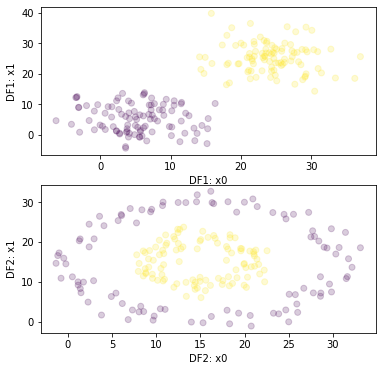

In [107]:

#sea.scatterplot(pdDataFrame1['x0'], pdDataFrame1['x1'], hue=pdDataFrame1['class'], data=pdDataFrame1)
#sea.scatterplot(pdDataFrame2['x0'], pdDataFrame2['x1'], hue=pdDataFrame2['class'], data=pdDataFrame2)

fig, ax = plt.subplots(2, figsize=(6, 6))
ax[0].scatter(pdDataFrame1['x0'], pdDataFrame1['x1'], alpha=0.2, c=pdDataFrame1['class'])
ax[0].set_xlabel('DF1: x0')
ax[0].set_ylabel('DF1: x1')

ax[1].scatter(pdDataFrame2['x0'], pdDataFrame2['x1'], alpha=0.2, c=pdDataFrame2['class'])
ax[1].set_xlabel('DF2: x0')
ax[1].set_ylabel('DF2: x1')

plt.show()


There seems to be an interesting pattern for the second dataset. The points of one class seems to be aggregated around the points of the other class.

In [108]:
#train a gaussian naive bayes classifier for all three datasets and output their scores and a list (list 3 models for each dataset)
from sklearn.naive_bayes import GaussianNB
i = 1
GNBModelList = []
for df in DataFrameList:
  X, t = sliceDataFrame(df)
  feature_train_data, feature_test_data, target_train_data, target_test_data = sk.model_selection.train_test_split(X, t, test_size = 0.2, train_size = 0.8, random_state=(2021-3-25))
  BModel = GaussianNB().fit(feature_train_data,np.ravel(target_train_data))
  print("Score of dataset", i, "using Gaussian Naive Bayes is" , BModel.score(feature_test_data, target_test_data))
  GNBModelList.append(BModel)
  i += 1


Score of dataset 1 using Gaussian Naive Bayes is 1.0
Score of dataset 2 using Gaussian Naive Bayes is 0.975
Score of dataset 3 using Gaussian Naive Bayes is 0.875


The scores for datasets 1 through 3 using Gaussian Naive Bayes classifier model with a 80/20% split are 
  * 1.0
  * 0.975
  * 0.875

respectively. 

These values are close to the logistic regression classifier but for dataset 2, the score value is much higher, indicating it is a better fit for this class of data.


In [109]:
#train a k nearest neighbors(k=5) for all datasets and output their scores and a list of KNN models
from sklearn.neighbors import KNeighborsClassifier
i = 1
KNNModelList = []
for df in DataFrameList:
  X, t = sliceDataFrame(df)
  feature_train_data, feature_test_data, target_train_data, target_test_data = sk.model_selection.train_test_split(X, t, test_size = 0.2, train_size = 0.8, random_state=(2021-3-25))
  KNNModel = KNeighborsClassifier(n_neighbors=5)
  #KNNModel.fit(X, np.ravel(t))
  KNNModel.fit(feature_train_data, np.ravel(target_train_data))
  #print("Score of dataset", i, "using K Nearest Neighbors is" , KNNModel.score(X, t))
  print("Score of dataset", i, "using K Nearest Neighbors is" , KNNModel.score(feature_test_data, target_test_data))
  KNNModelList.append(KNNModel)
  i += 1

Score of dataset 1 using K Nearest Neighbors is 1.0
Score of dataset 2 using K Nearest Neighbors is 1.0
Score of dataset 3 using K Nearest Neighbors is 1.0


Using a K Nearest Neighbor model, all three datasets achieve a score of 1 with a 80/20% split. 

In [110]:

#desc: draws a decision boundary given a dataset and a pretrained model. MODEL MUST BE TRAINED FIRST. 
#input: (dataset) pandas dataframe datatype
#input: (trainedModel) a pretraiend classification model, can be KNN, logistic regresion or gaussian naive bayes
#input: (resoltion) graph resolution
#based on: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
def DrawDecisionBoundary(Dataset, trainedModel, resolution):
  df_X, df_t = sliceDataFrame(Dataset)

  X = df_X.to_numpy() #change from dataframe to numpy array
  t = df_t.to_numpy() #change from dataframe to numpy array

  min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
  min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
  # define the x and y scale
  x1grid = np.arange(min1, max1, resolution)
  x2grid = np.arange(min2, max2, resolution)
  # create all of the lines and rows of the grid
  xx, yy = np.meshgrid(x1grid, x2grid)
  # flatten each grid to a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
  # horizontal stack vectors to create x1,x2 input for the model
  grid = np.hstack((r1,r2))  
  # make predictions for the grid
  yHat = trainedModel.predict(grid)
  # reshape the predictions back into a grid
  zz = yHat.reshape(xx.shape)
  # plot the grid of x, y and z values as a surface
  plt.contourf(xx, yy, zz, cmap='Paired')
  # create scatter plot for samples from each class
  for class_value in range(2):
      # get row indexes for samples with this class
      row_ix = np.where(t == class_value)
      # create scatter of these samples
      plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
  plt.show()


Decision Boundary of Logistic Regression Classifier


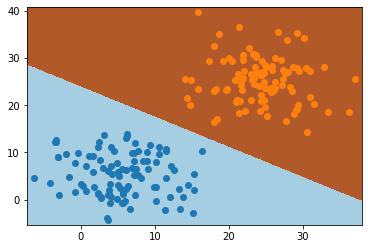

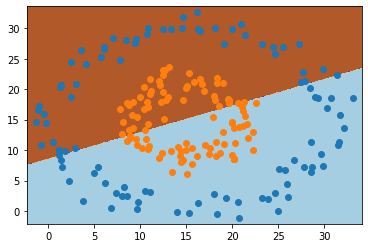

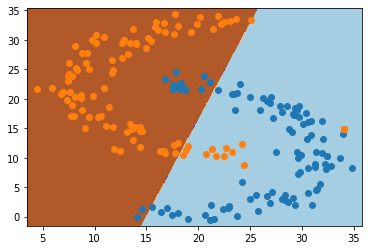

Decision Boundary of Gaussian Naive Bayes Classifier


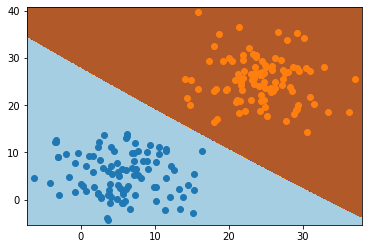

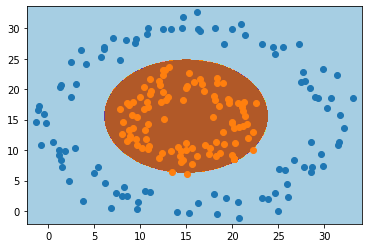

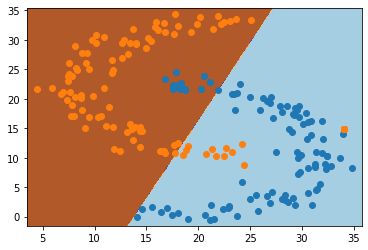

Decision Boundary of k-Nearest Neighbor Classifier


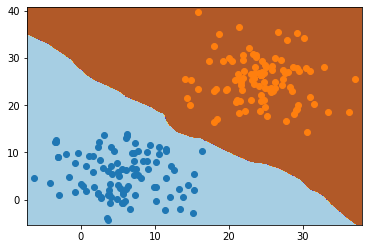

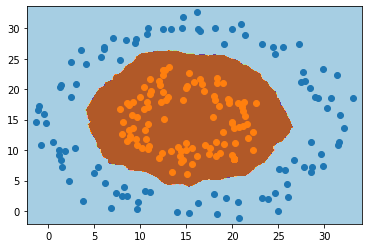

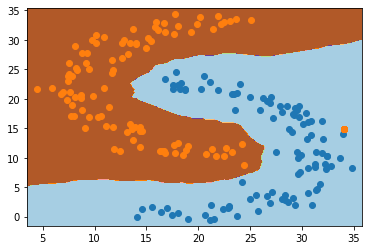

In [111]:

#the above code trained three types of classification models collected in lists of 3 models each trained with their respective datasets
#LRModelList contains all logistic regression models
#GNBModelList contains all gausian naive bays model
#KNNModelList containes all k nearest neighbor models
print("Decision Boundary of Logistic Regression Classifier")
for (df,m) in zip(DataFrameList, LRModelList): 
  DrawDecisionBoundary(df, m, 0.1)

print("Decision Boundary of Gaussian Naive Bayes Classifier")
for (df,m) in zip(DataFrameList, GNBModelList): 
  DrawDecisionBoundary(df, m, 0.1)

print("Decision Boundary of k-Nearest Neighbor Classifier")
for (df,m) in zip(DataFrameList, KNNModelList): 
  DrawDecisionBoundary(df, m, 0.1)
